In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import make_regression

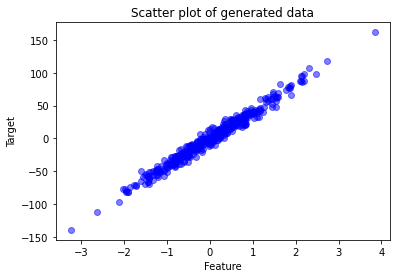

In [17]:
X, y = make_regression(n_samples=400, n_features=1,n_informative=1, noise=6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.scatter(X, y, color='blue', alpha=0.5)
plt.title('Scatter plot of generated data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(f"Model score: {score:.2f}")



Model score: 0.98


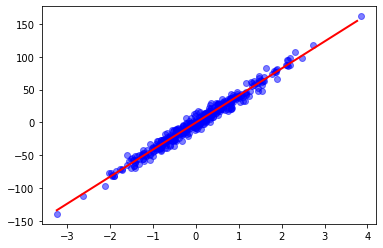

In [ ]:
_x_range = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1) # Create a range of values for prediction
#-1 , 1 means that the array is reshaped to have 1 column and as many rows as needed
y_pred = lr.predict(_x_range)

plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(_x_range, y_pred, color='red', linewidth=2)
plt.show()